In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)# column생략 안하고 다 보여줌
pd.set_option('display.max_rows',None)

### 1. 문제정의
- 화이트,레드 와인 데이터를 분석해보자.

### 2. 데이터 수집
- UCI 저장소

### 3. 데이터 전처리

In [2]:
import glob 
import os 


In [5]:
path=os.path.join('data','winequality*')
path
#데이터란 폴더 밑에 winequality로 시작하는

'data\\winequality*'

In [7]:
all_file_names=glob.glob(path)
all_file_names

['data\\winequality-red (7).csv', 'data\\winequality-white (5).csv']

In [12]:
all_df_list=[]
for i,file in enumerate(all_file_names):
    df=pd.read_csv(file,sep=';')
    df['type']=i
    all_df_list.append(df)
    #0 red, 1 white
    #print는 문자열로 ,display는 셀에서 실행시키는 모양으로
    #enumerate-> 순환할때마다 인덱스로 표시하고 싶을 때

In [13]:
all_df_list[0]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [14]:
all_df_list[1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [17]:
wine=pd.concat(all_df_list,ignore_index=True)
#기존에 있는 인덱스 무시하고 전체적으로 다시 만듦
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


### 4. 데이터 탐색

In [18]:
wine.info()#결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [19]:
wine.describe()#기술통계 확인

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [20]:
wine.corrwith(wine['type'])
#내가 보고자 하는 컬럼과 상관계수

fixed acidity          -0.486740
volatile acidity       -0.653036
citric acid             0.187397
residual sugar          0.348821
chlorides              -0.512678
free sulfur dioxide     0.471644
total sulfur dioxide    0.700357
density                -0.390645
pH                     -0.329129
sulphates              -0.487218
alcohol                 0.032970
quality                 0.119323
type                    1.000000
dtype: float64

In [23]:
#데이터 범주별로 모아서 정보를 확인해보자(ex :기술통계)
result=wine.groupby(by='type').describe()
result

fixed acidity                                                \
             count      mean       std  min  25%  50%  75%   max   
type                                                               
0           1599.0  8.319637  1.741096  4.6  7.1  7.9  9.2  15.9   
1           4898.0  6.854788  0.843868  3.8  6.3  6.8  7.3  14.2   

     volatile acidity            ... alcohol       quality            \
                count      mean  ...     75%   max   count      mean   
type                             ...                                   
0              1599.0  0.527821  ...    11.1  14.9  1599.0  5.636023   
1              4898.0  0.278241  ...    11.4  14.2  4898.0  5.877909   

                                         
           std  min  25%  50%  75%  max  
type                                     
0     0.807569  3.0  5.0  6.0  6.0  8.0  
1     0.885639  3.0  5.0  6.0  6.0  9.0  

[2 rows x 96 columns]

In [24]:
result['volatile acidity']

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
0,1599.0,0.527821,0.179060,0.12,0.39,0.52,0.64,1.58
1,4898.0,0.278241,0.100795,0.08,0.21,0.26,0.32,1.10


In [25]:
#시각화
red_wine=wine.loc[wine['type']==0,'volatile acidity']
white_wine=wine.loc[wine['type']==1,'volatile acidity']

C:\Users\SMT063\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SMT063\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

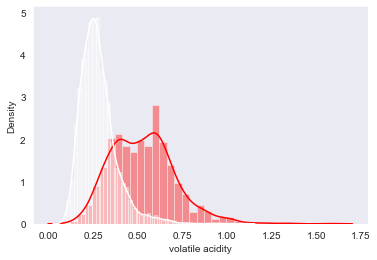

In [27]:
sns.set_style('dark')
sns.distplot(red_wine,color='red',label='red wine')
sns.distplot(white_wine,color='white',label='white wine')

In [28]:
red_wine=wine.loc[wine['type']==0,'total sulfur dioxide']
white_wine=wine.loc[wine['type']==1,'total sulfur dioxide']

C:\Users\SMT063\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SMT063\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

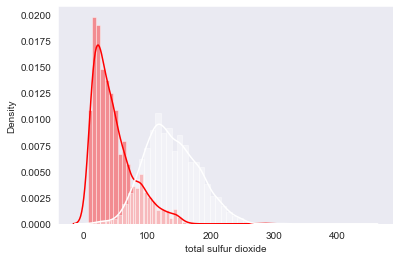

In [29]:
sns.set_style('dark')
sns.distplot(red_wine,color='red',label='red wine')
sns.distplot(white_wine,color='white',label='white wine')

In [30]:
#산점도와 회귀선
#화이트 와인과 레드와인을 몇 개만 샘플링해서 시각화하자(250개)

In [31]:
def take_sample(df,n=250):
    return df.loc[np.random.choice(df.index,size=n,replace=False)]
#번호 선택지에서 난수를 골라주는 것
#비복원 추출(중복방지)

In [32]:
red_samples=take_sample(wine[wine['type']==0])

In [33]:
red_samples.shape

(250, 13)

In [34]:
white_samples=take_sample(wine[wine['type']==1])

In [35]:
white_samples.shape

(250, 13)

In [36]:
wine_samples=pd.concat([red_samples,white_samples])

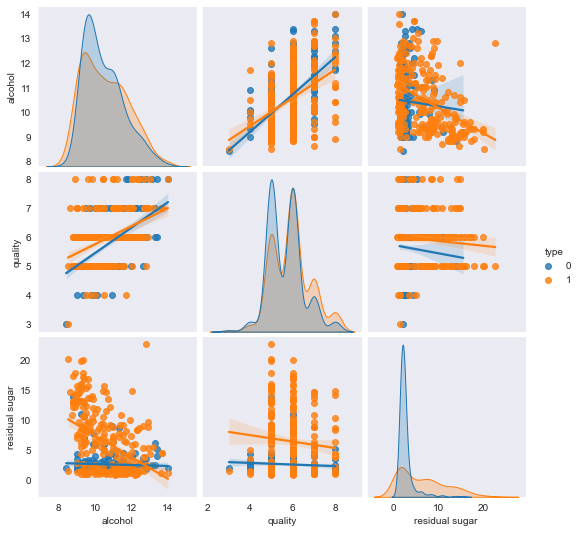

In [38]:
sns.pairplot(wine_samples,kind='reg', hue='type',
             vars=['alcohol','quality','residual sugar'])

### 5. 모델 선택 및 하이퍼파라미터 튜닝

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [40]:
logi_model=LogisticRegression()
svc_model=LinearSVC()

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [43]:
X=wine[['volatile acidity','total sulfur dioxide']]
y=wine['type']

In [44]:
X.shape,y.shape

((6497, 2), (6497,))

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
logi_result=cross_val_score(logi_model,X_train,y_train,cv=5)
logi_result.mean()

0.9513563944611173

In [48]:
svc_result=cross_val_score(svc_model,X_train,y_train,cv=5)
svc_result.mean()

C:\Users\SMT063\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\SMT063\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\SMT063\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\SMT063\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\SMT063\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of itera

0.8883805612594113

In [49]:
# 규제 값 튜닝, 스케일링
logi_model=LogisticRegression(C=0.1)

In [50]:
logi_result=cross_val_score(logi_model,X_train,y_train,cv=5)
logi_result.mean()

0.9402729426630865

In [51]:
logi_model=LogisticRegression(C=10)
logi_result=cross_val_score(logi_model,X_train,y_train,cv=5)
logi_result.mean()

0.9546403411783289

In [52]:
logi_model=LogisticRegression(C=100)
logi_result=cross_val_score(logi_model,X_train,y_train,cv=5)
logi_result.mean()

0.9538189859421891

In [53]:
svc_model=LinearSVC(C=0.1)
svc_result=cross_val_score(svc_model,X_train,y_train,cv=5)
svc_result.mean()

C:\Users\SMT063\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\SMT063\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\SMT063\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\SMT063\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\SMT063\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of itera

0.9484831253619757

In [54]:
svc_model=LinearSVC(C=10)
svc_result=cross_val_score(svc_model,X_train,y_train,cv=5)
svc_result.mean()

C:\Users\SMT063\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\SMT063\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\SMT063\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\SMT063\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\SMT063\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of itera

0.9452021270994576

In [55]:
svc_model=LinearSVC(C=100)
svc_result=cross_val_score(svc_model,X_train,y_train,cv=5)
svc_result.mean()

C:\Users\SMT063\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\SMT063\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\SMT063\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\SMT063\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\SMT063\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of itera

0.7917483283314906

In [56]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler =MinMaxScaler()
scaler.fit(X,y)
X_train_scaled = scaler.transform(X_train)